In [1]:
import matplotlib.pyplot as plt
from main import ABC_algorithm
from FitnessEvaluator import *

In [3]:
def avarage(lst): 
    return sum(lst) / len(lst) 

def execute_X_times(X_TIMES, COLONY_SIZE, LEFT_BOUND, RIGHT_BOUND, SEARCH_SPACE_DIMENSIONS, fitnessEvaluator, NUMBER_ITERATIONS, MAX_IMPROV_TRIES):
    Y_results = []
    X_results = []

    for i in range(X_TIMES):
        X, Y = ABC_algorithm(COLONY_SIZE, LEFT_BOUND, RIGHT_BOUND, SEARCH_SPACE_DIMENSIONS, fitnessEvaluator, NUMBER_ITERATIONS, MAX_IMPROV_TRIES)
        if i == 0:
            X_results = X

        Y_results.append(Y)

    Y_mean = []

    for i in range(len(Y_results[0])):
        Y_values = [curr_result[i] for curr_result in Y_results]

        Y_mean.append(avarage(Y_values))
    
    return X_results, Y_mean

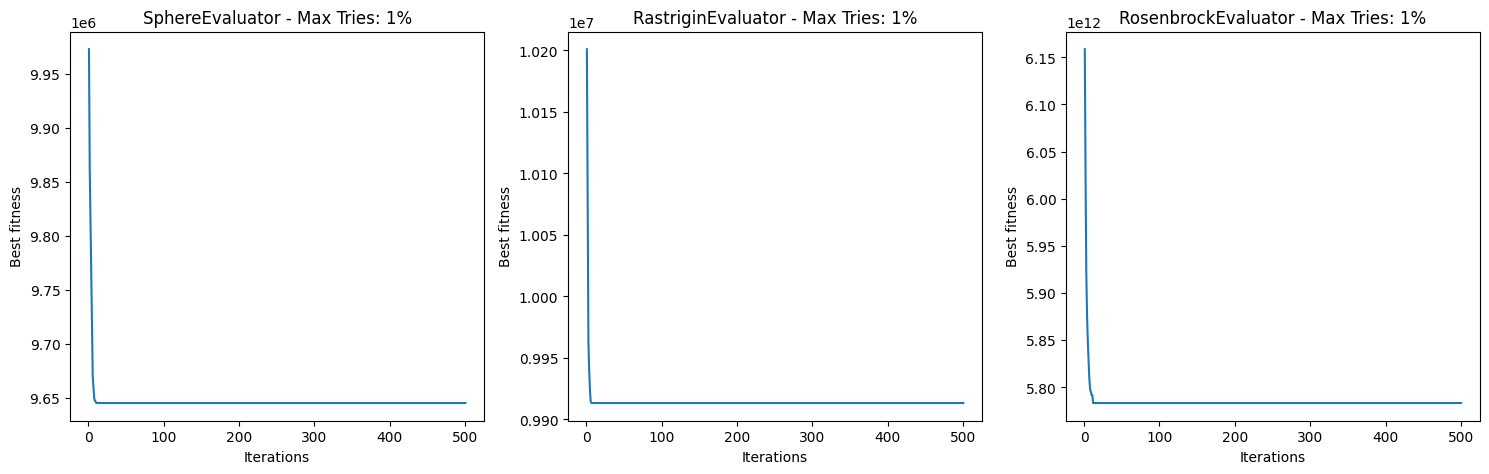

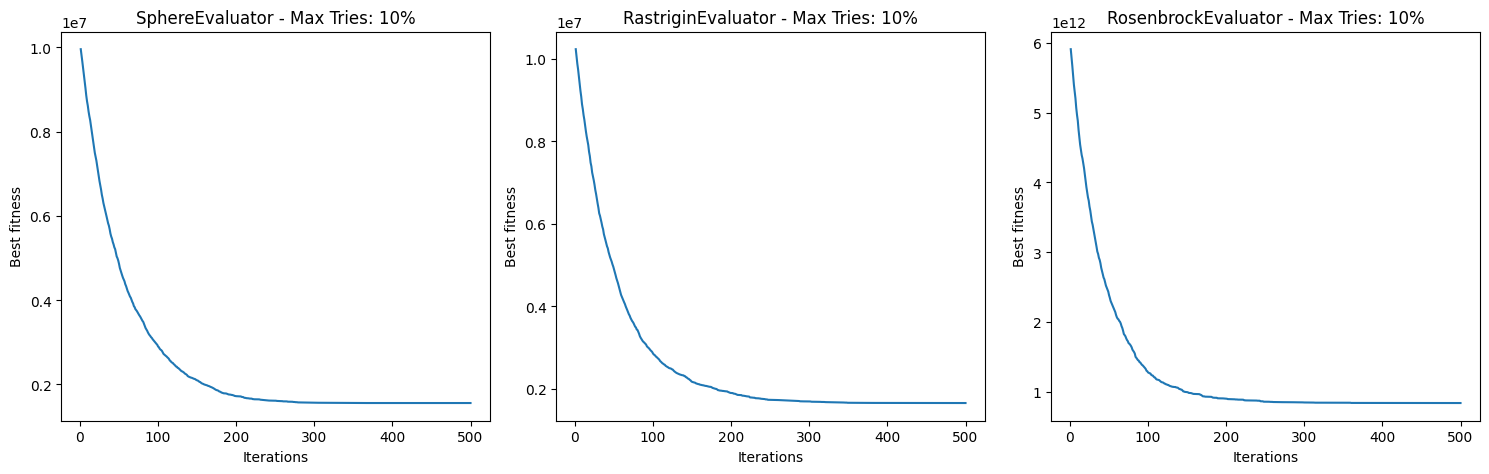

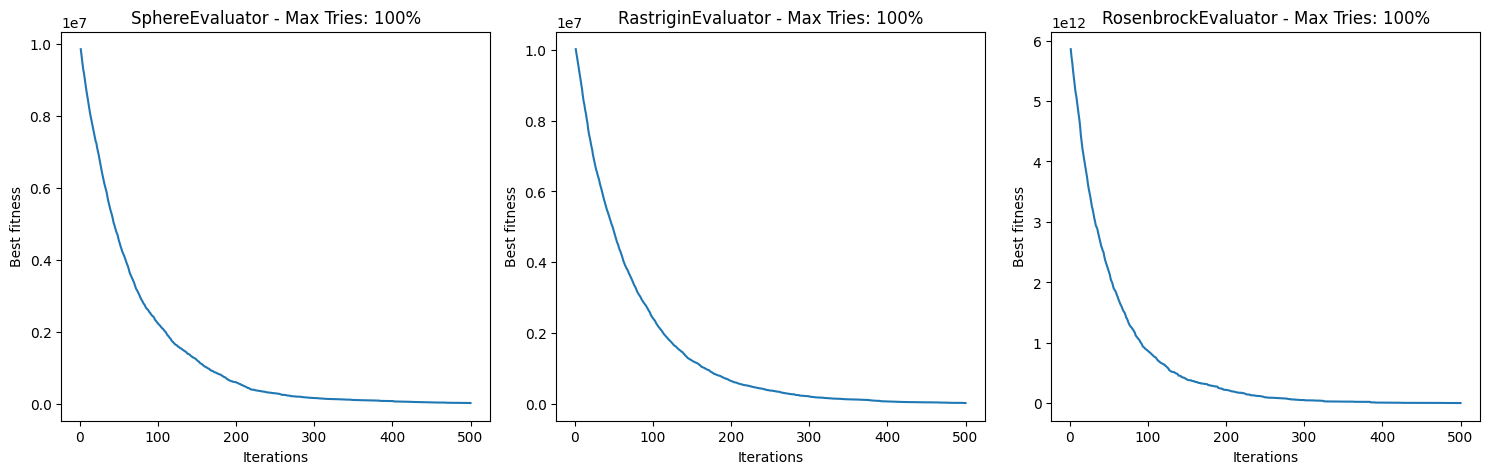

In [ ]:
COLONY_SIZE = 100
NUMBER_ITERATIONS = 500
LEFT_BOUND = -100
RIGHT_BOUND = 100
SEARCH_SPACE_DIMENSIONS = 30
MAX_IMPROV_TRIES = COLONY_SIZE

evaluators = [SphereEvaluator(), RastriginEvaluator(), RosenbrockEvaluator()]
MAX_IMPROV_APPROACHES = {"1%":MAX_IMPROV_TRIES*1/100, "10%":int(MAX_IMPROV_TRIES*1/10), "100%":MAX_IMPROV_TRIES}

def plot_cenario(X_list, Y_list, evaluators, max_type):
    fig, axes = plt.subplots(10, len(evaluators), figsize=(15, 5))

    for i, (X, Y, evaluator) in enumerate(zip(X_list, Y_list, evaluators)):
        axes[i].plot(X, Y)
        axes[i].set_title(f'{type(evaluator).__name__} - Max Tries: {max_type}')
        axes[i].set_xlabel('Iterations')
        axes[i].set_ylabel('Best fitness')
    
    plt.tight_layout()
    plt.show()

for max_type in MAX_IMPROV_APPROACHES.keys():
    X_list, Y_list = [], []
    for ev in evaluators:
        X, Y = execute_X_times(1, COLONY_SIZE, LEFT_BOUND, RIGHT_BOUND, SEARCH_SPACE_DIMENSIONS, ev, NUMBER_ITERATIONS, MAX_IMPROV_APPROACHES[max_type])
        X_list.append(X)
        Y_list.append(Y)
    
    plot_cenario(X_list, Y_list, evaluators, max_type)
